In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats

import dask.dataframe as dd
from pathlib import Path
import glob

import datetime as dt

import matplotlib.pyplot as plt
from matplotlib import colors
import soundfile as sf
import matplotlib.patches as patches

In [2]:
import sys

sys.path.append("../src")
sys.path.append("../src/activity")

In [3]:
import subsampling as ss
from core import SITE_NAMES, FREQ_GROUPS

from cli import get_file_paths
import plot
import pipeline

Telephone 


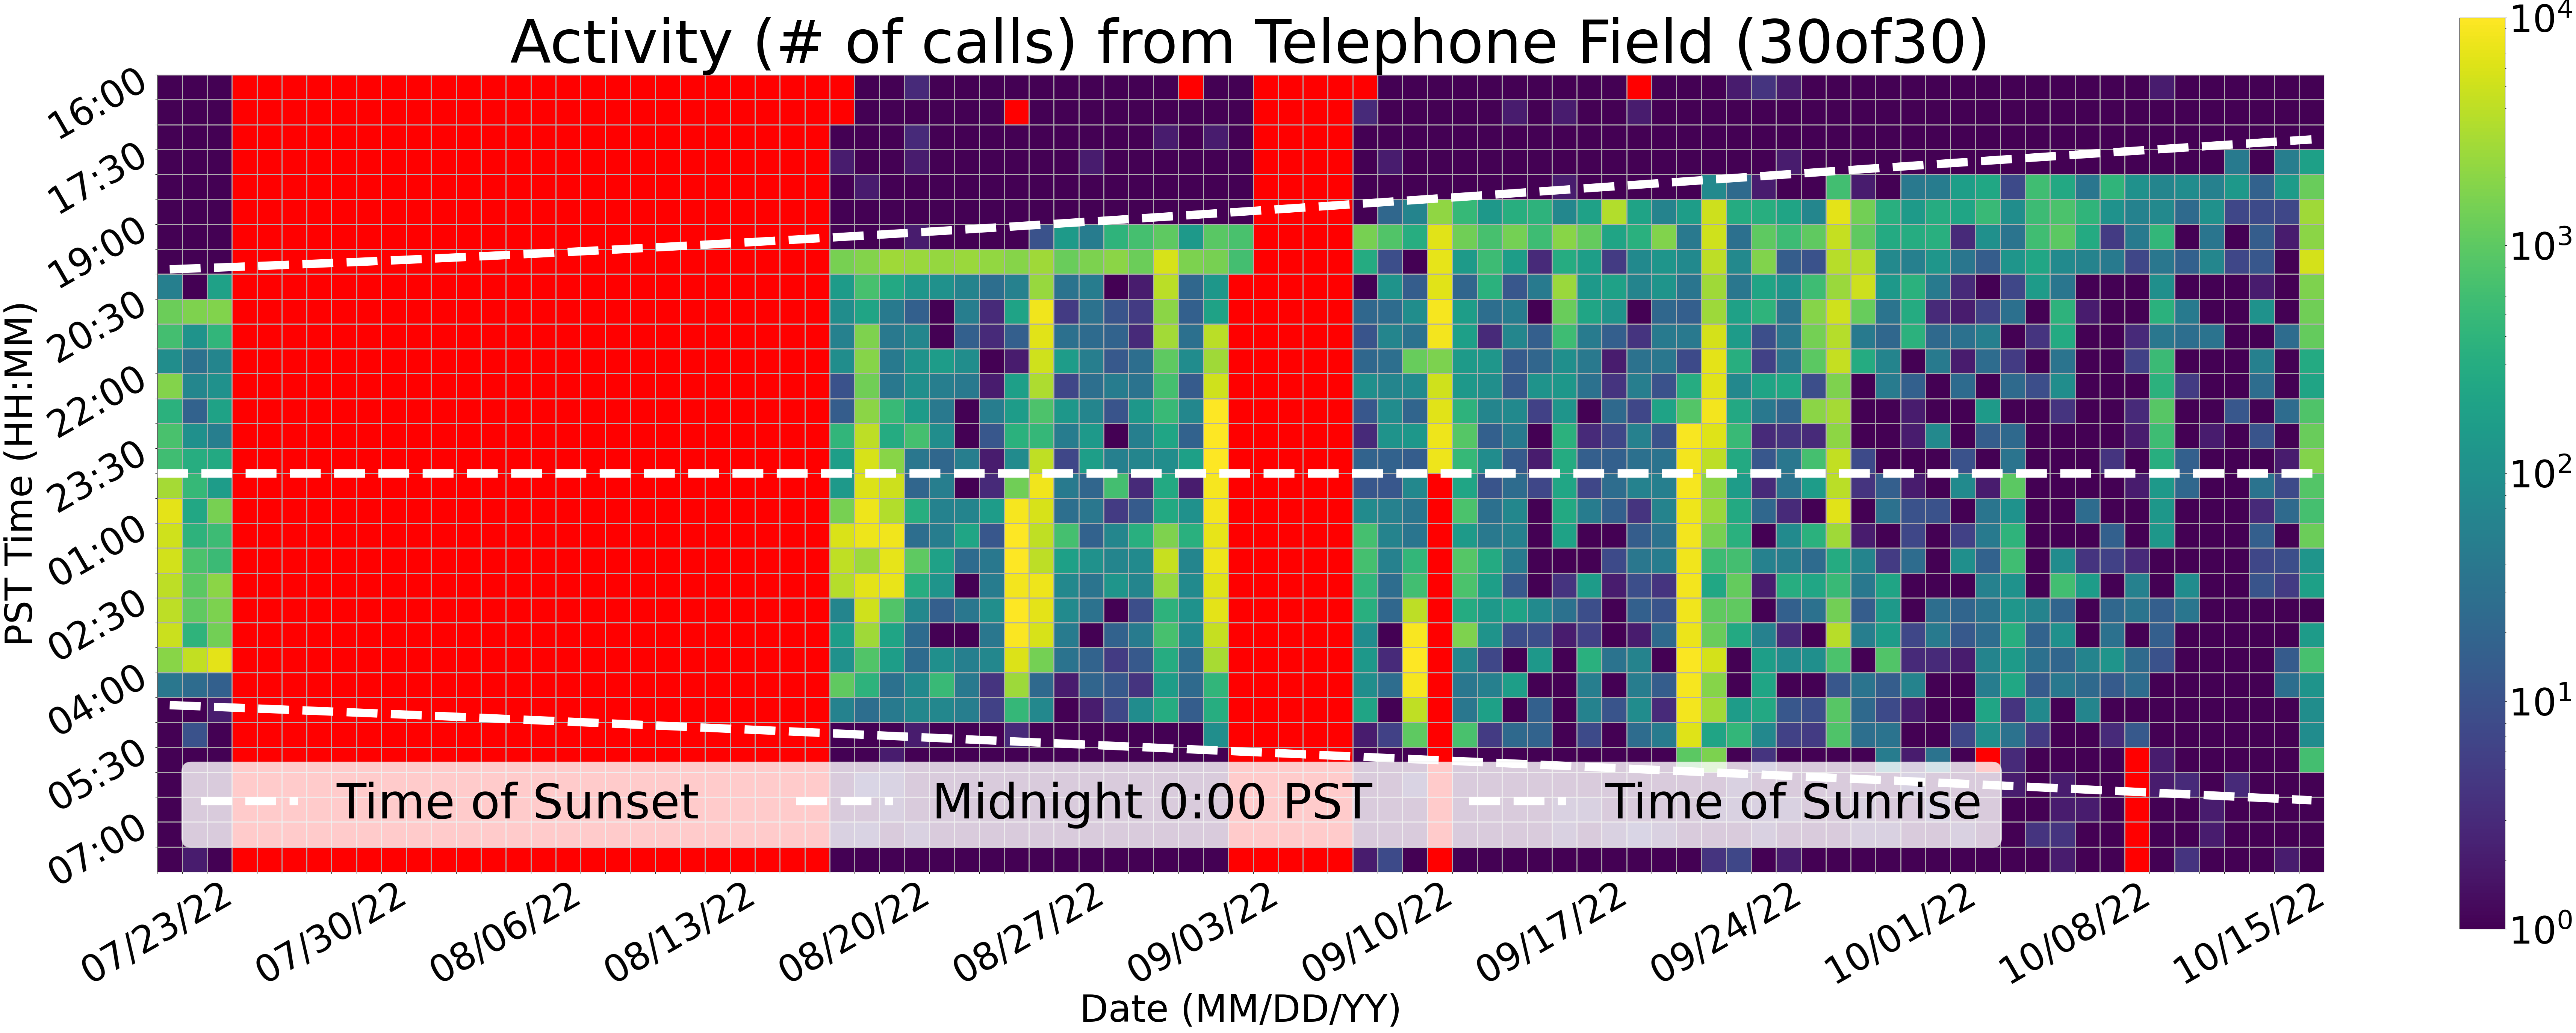

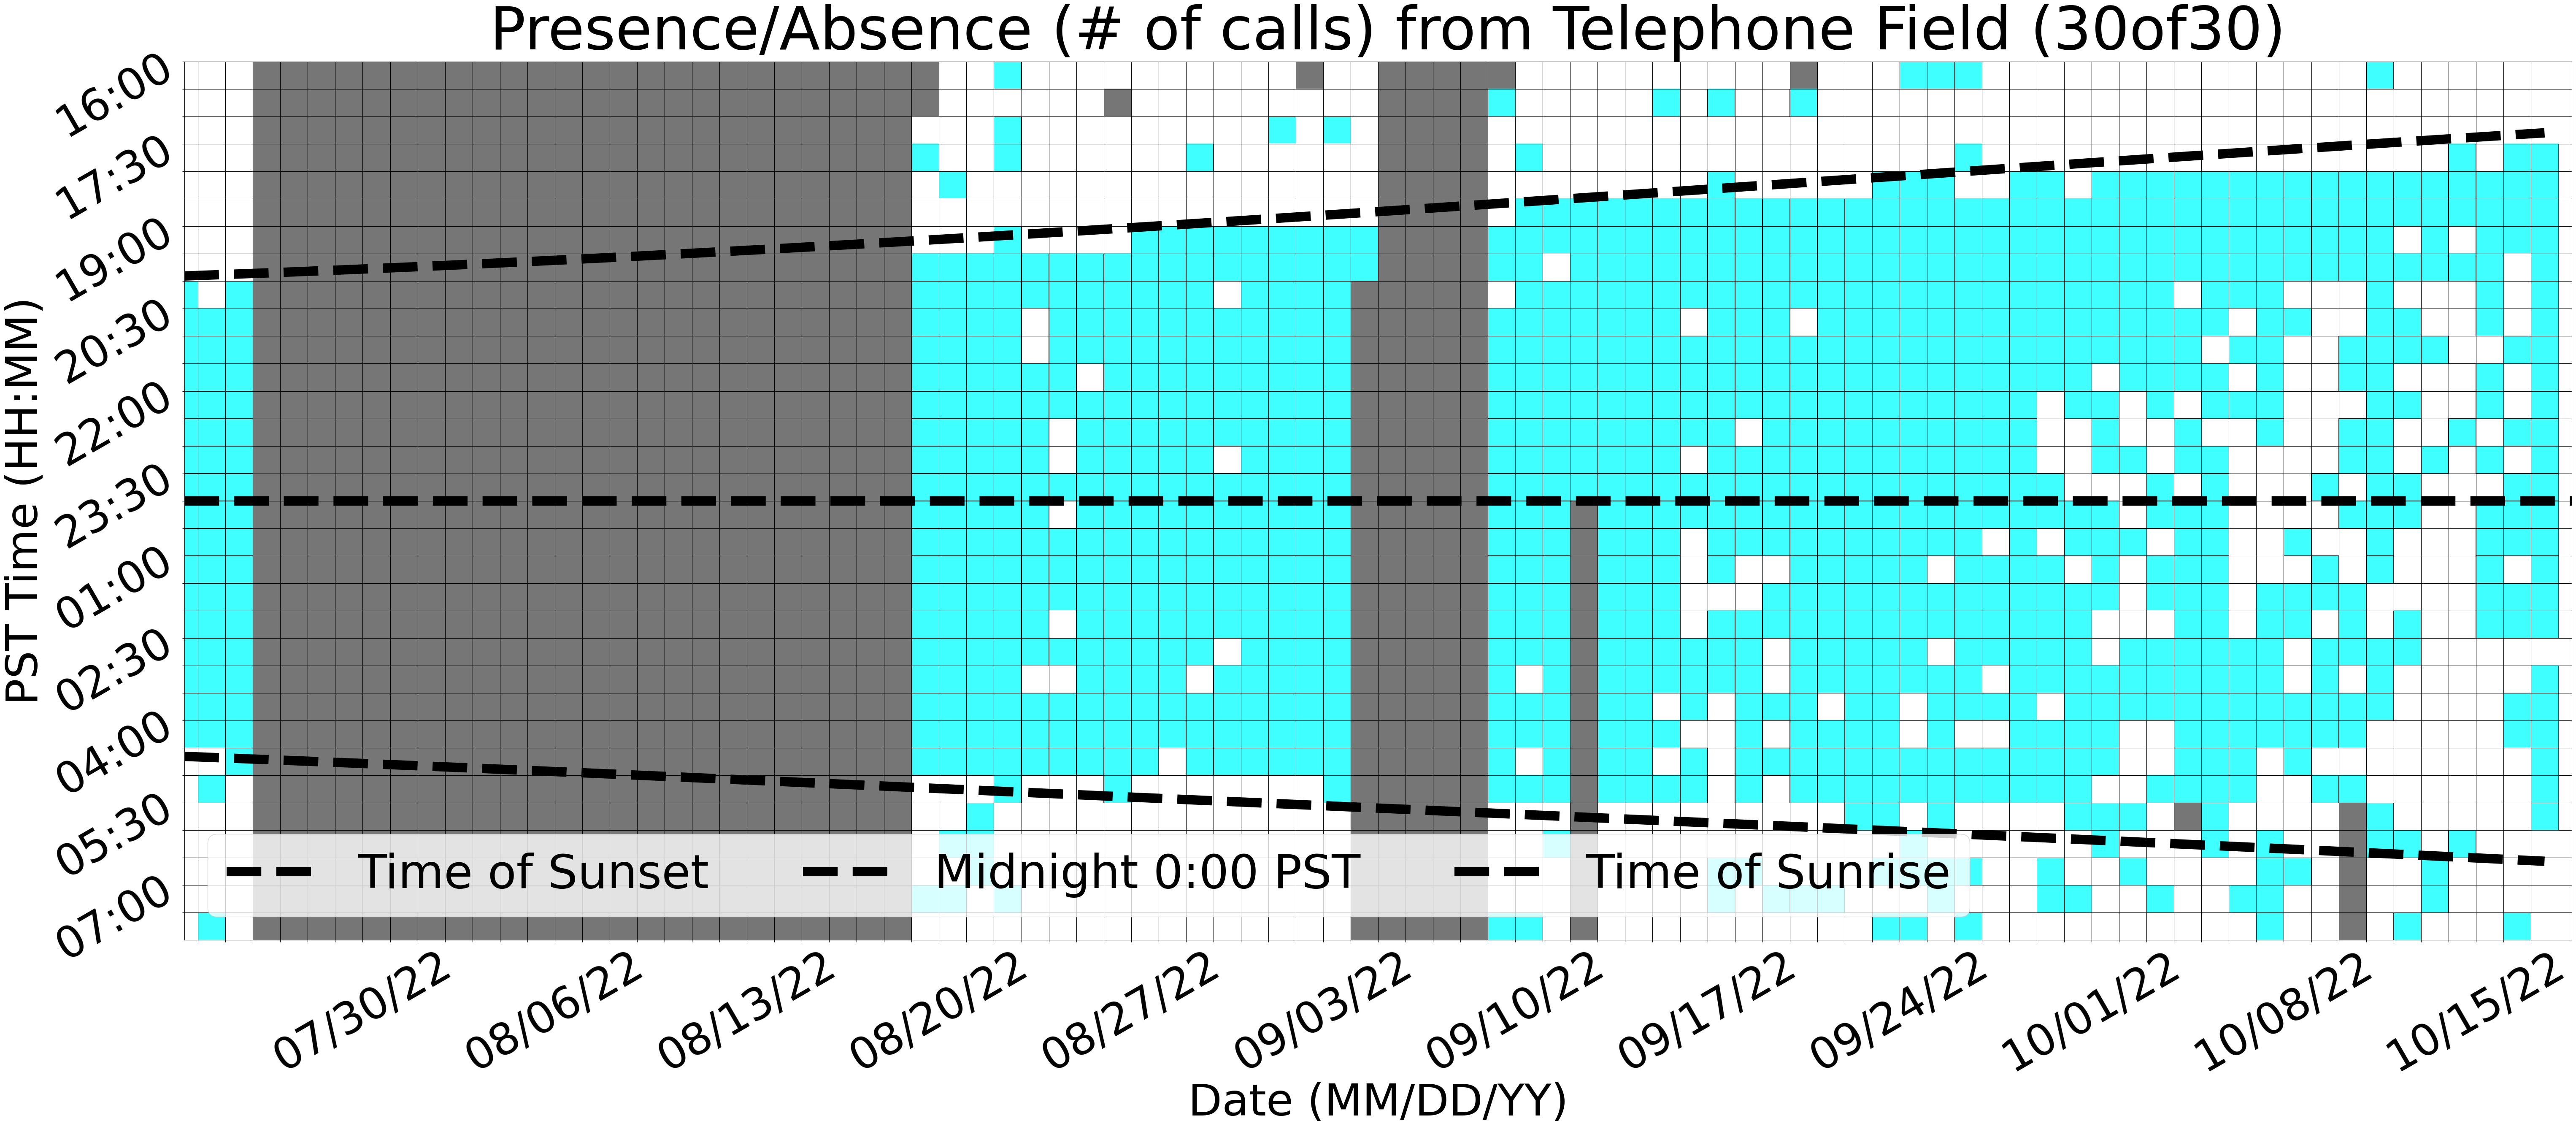

Telephone LF1


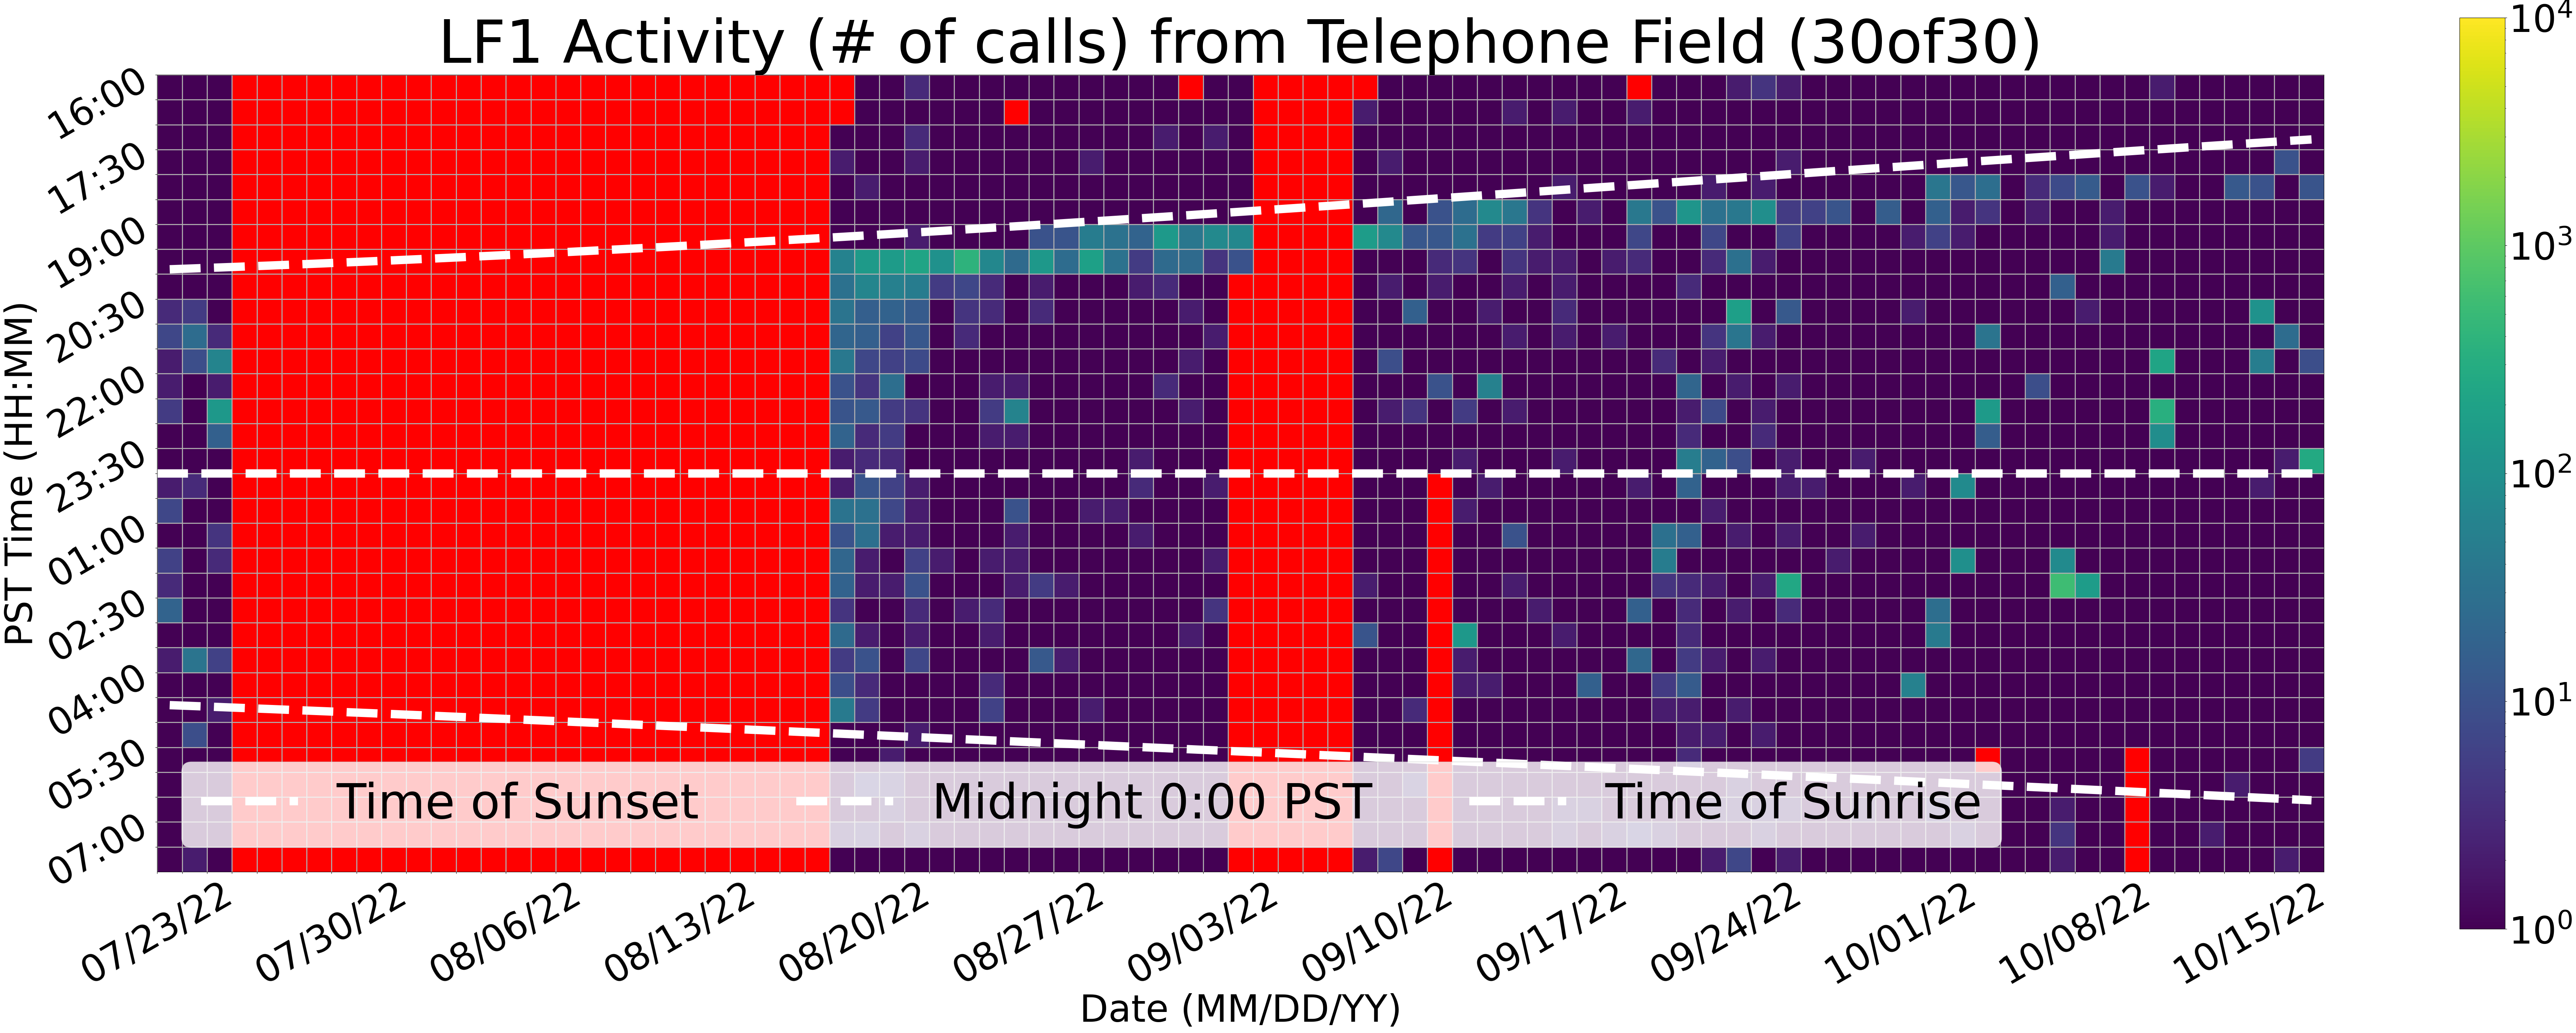

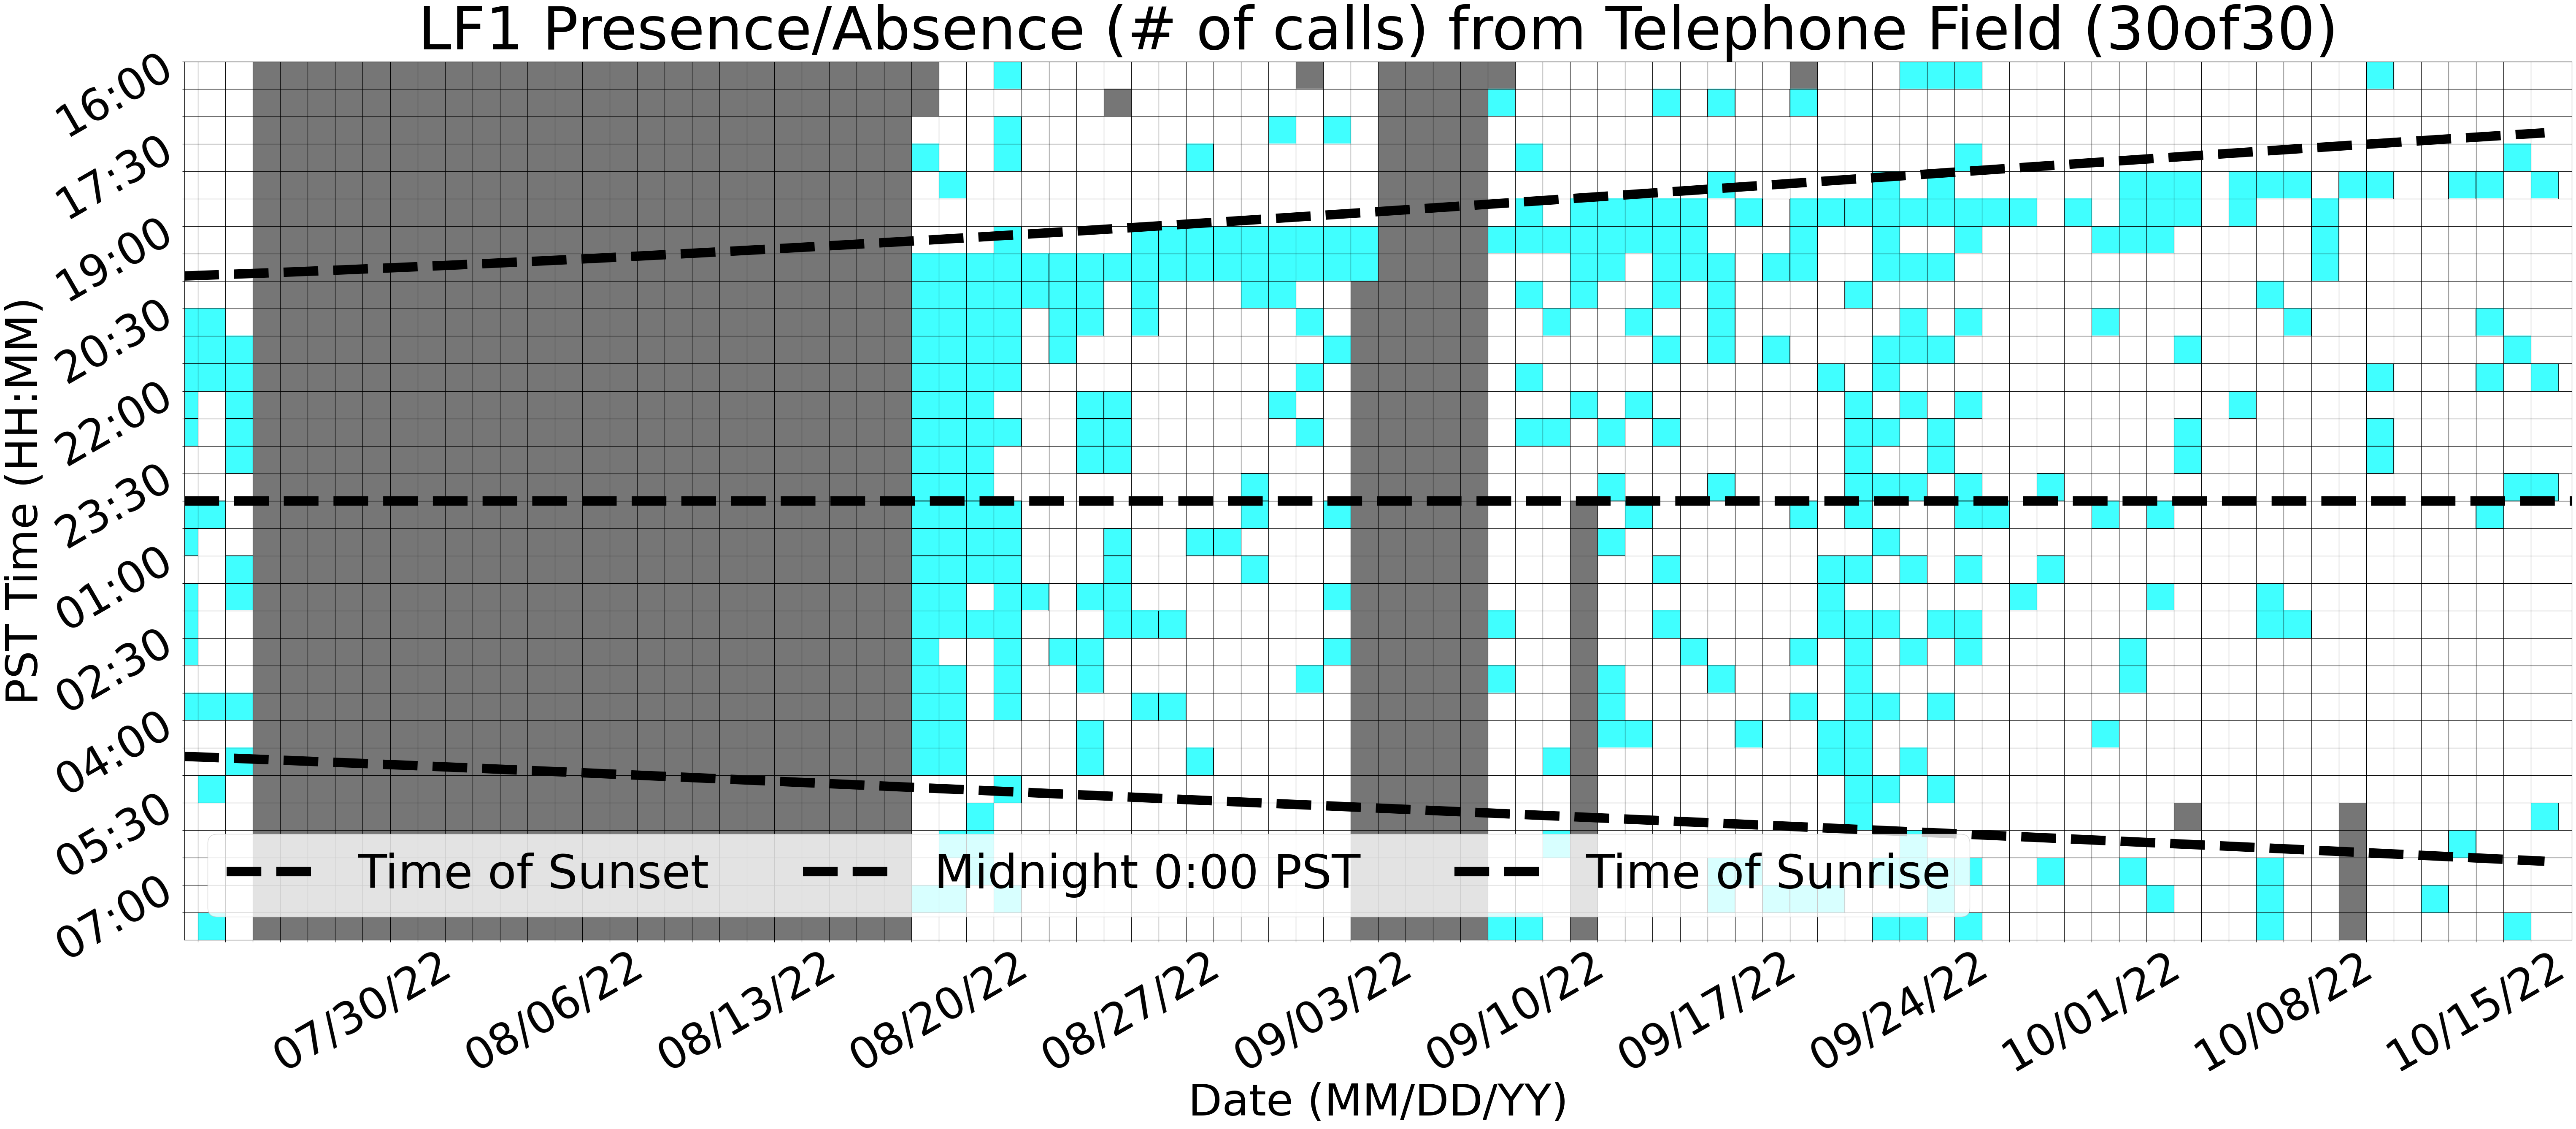

Telephone HF1


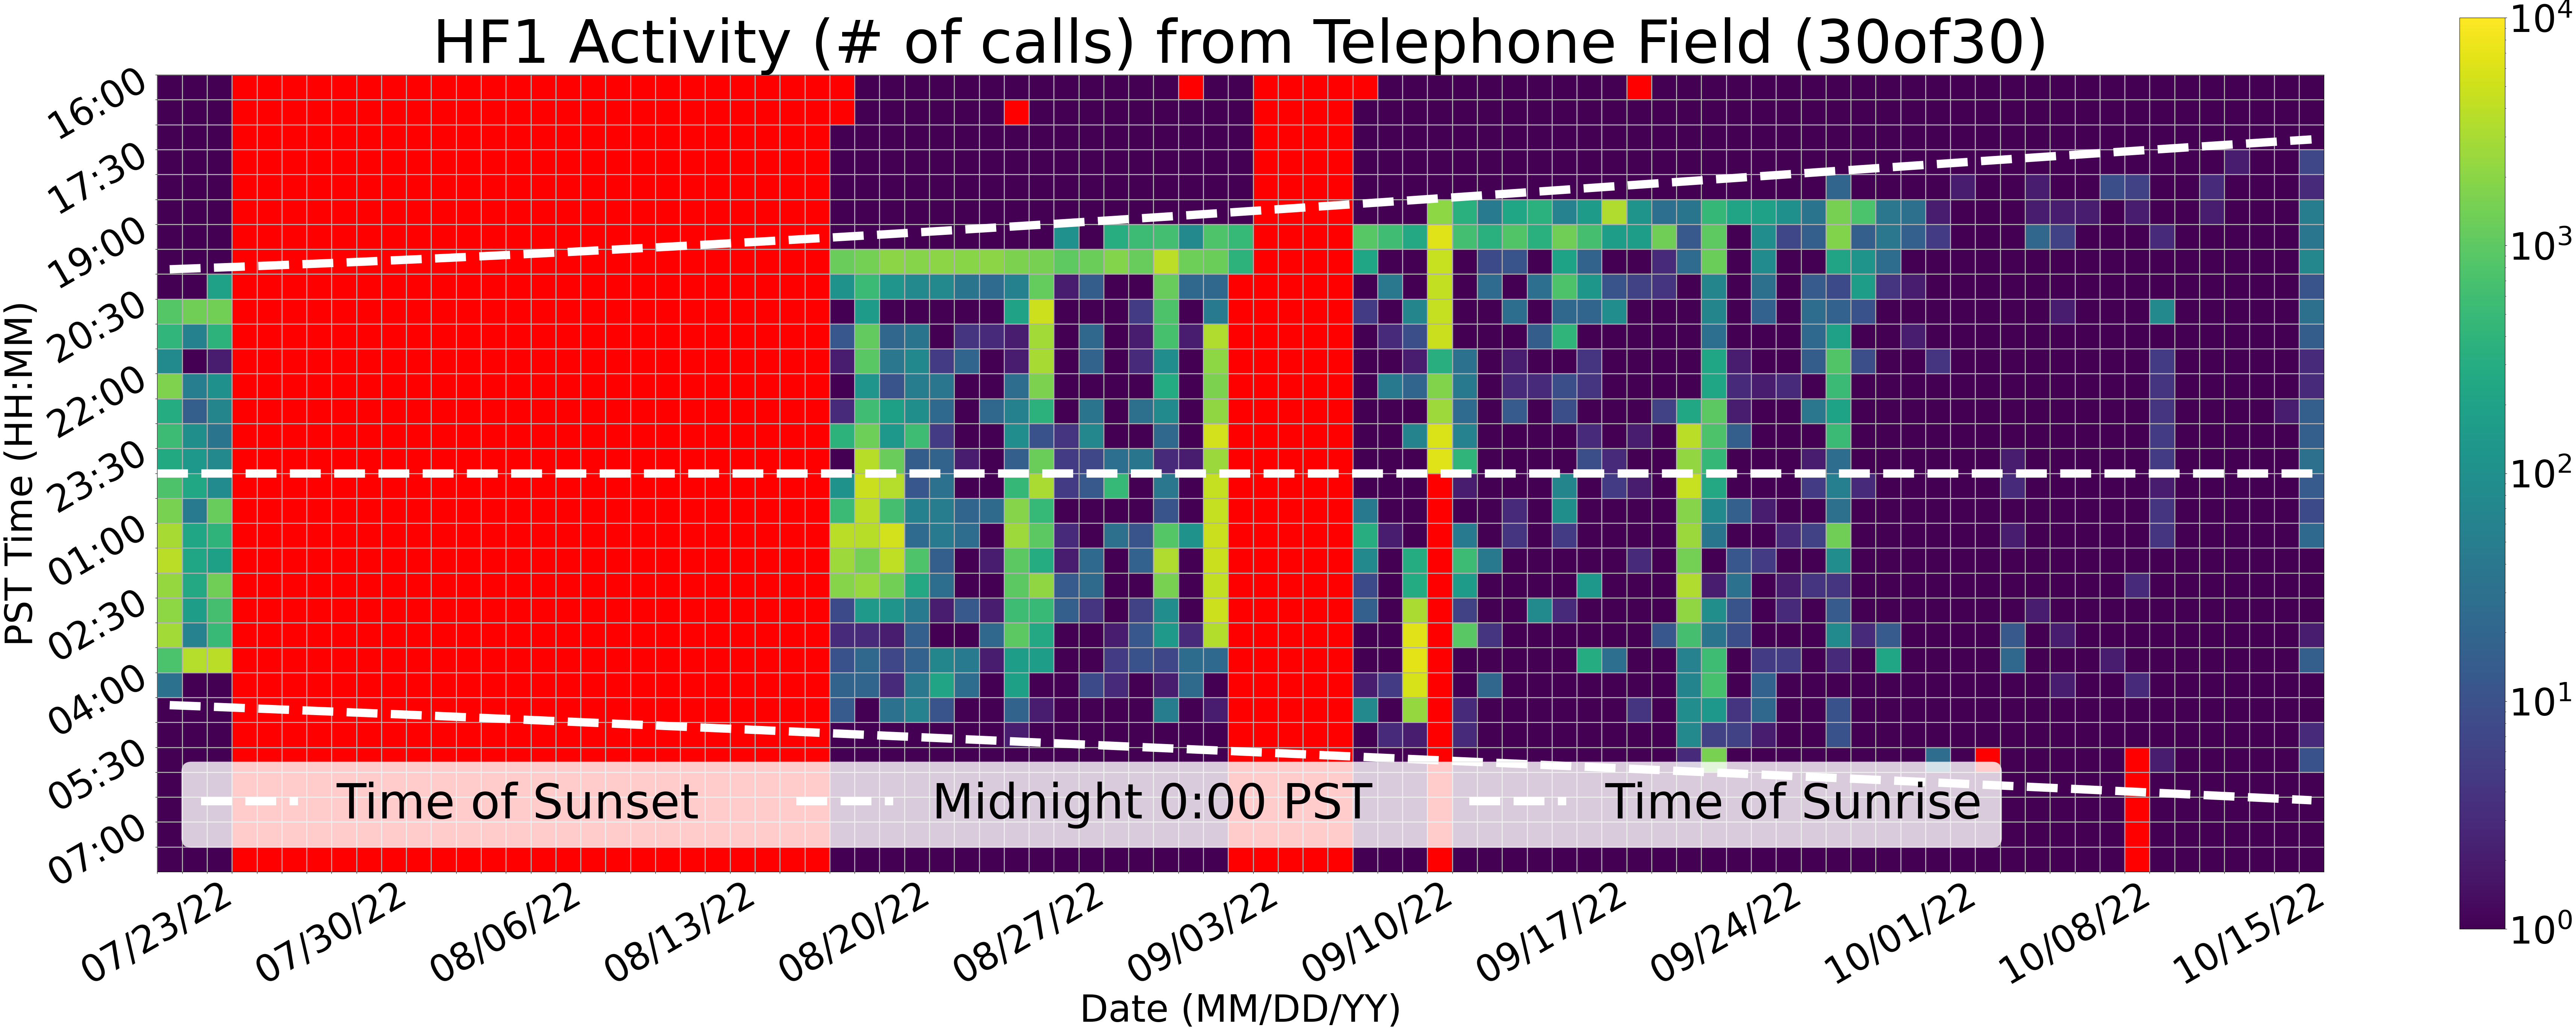

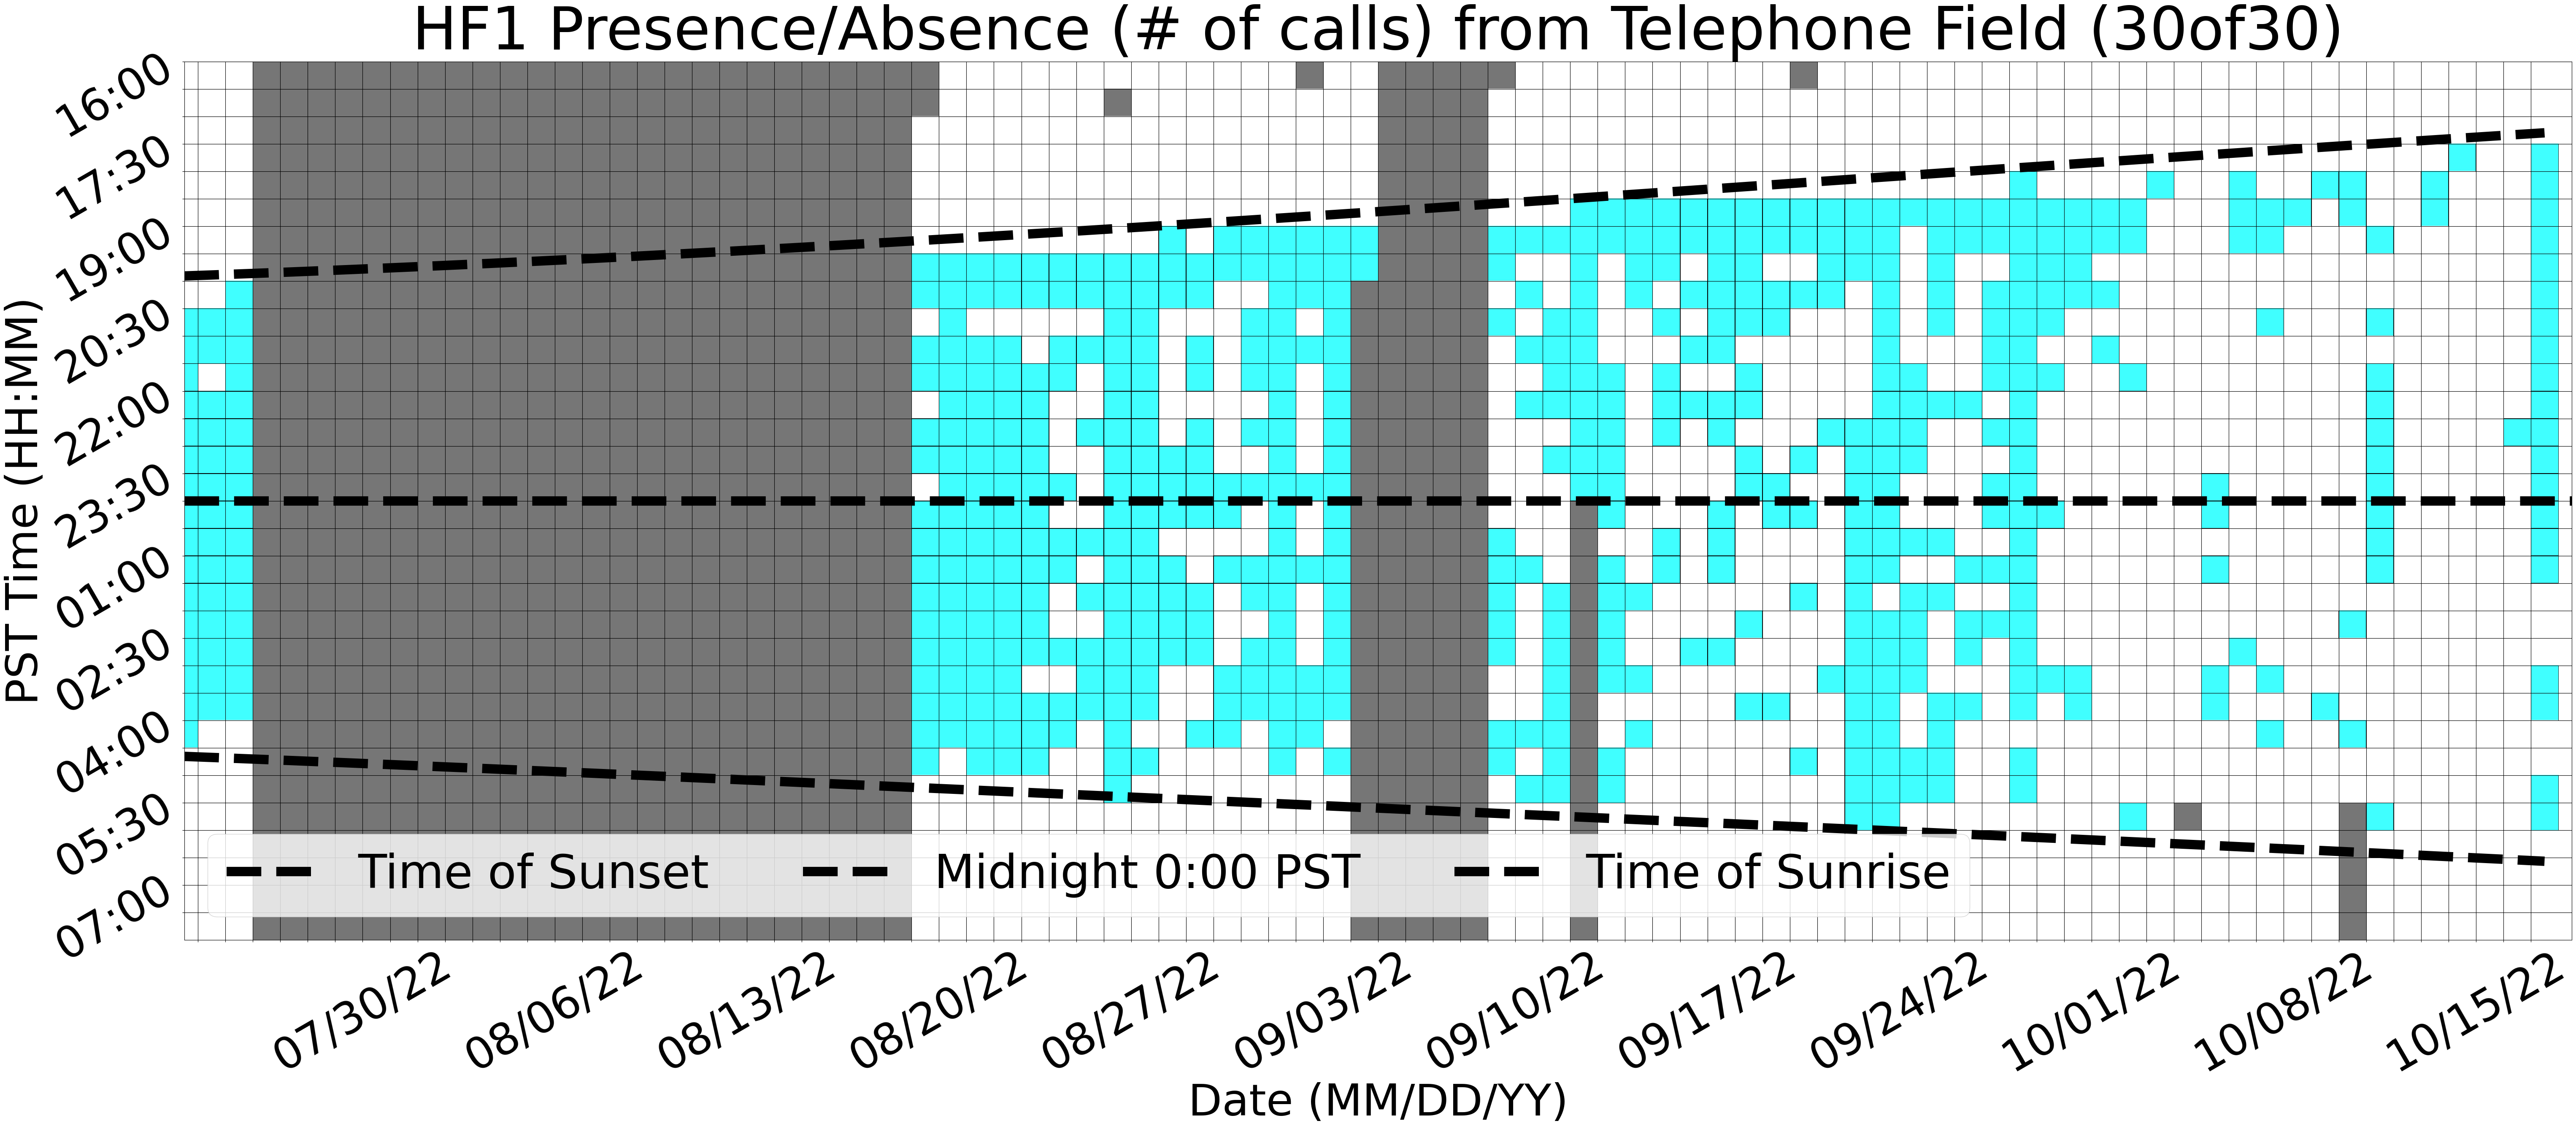

Telephone HF2


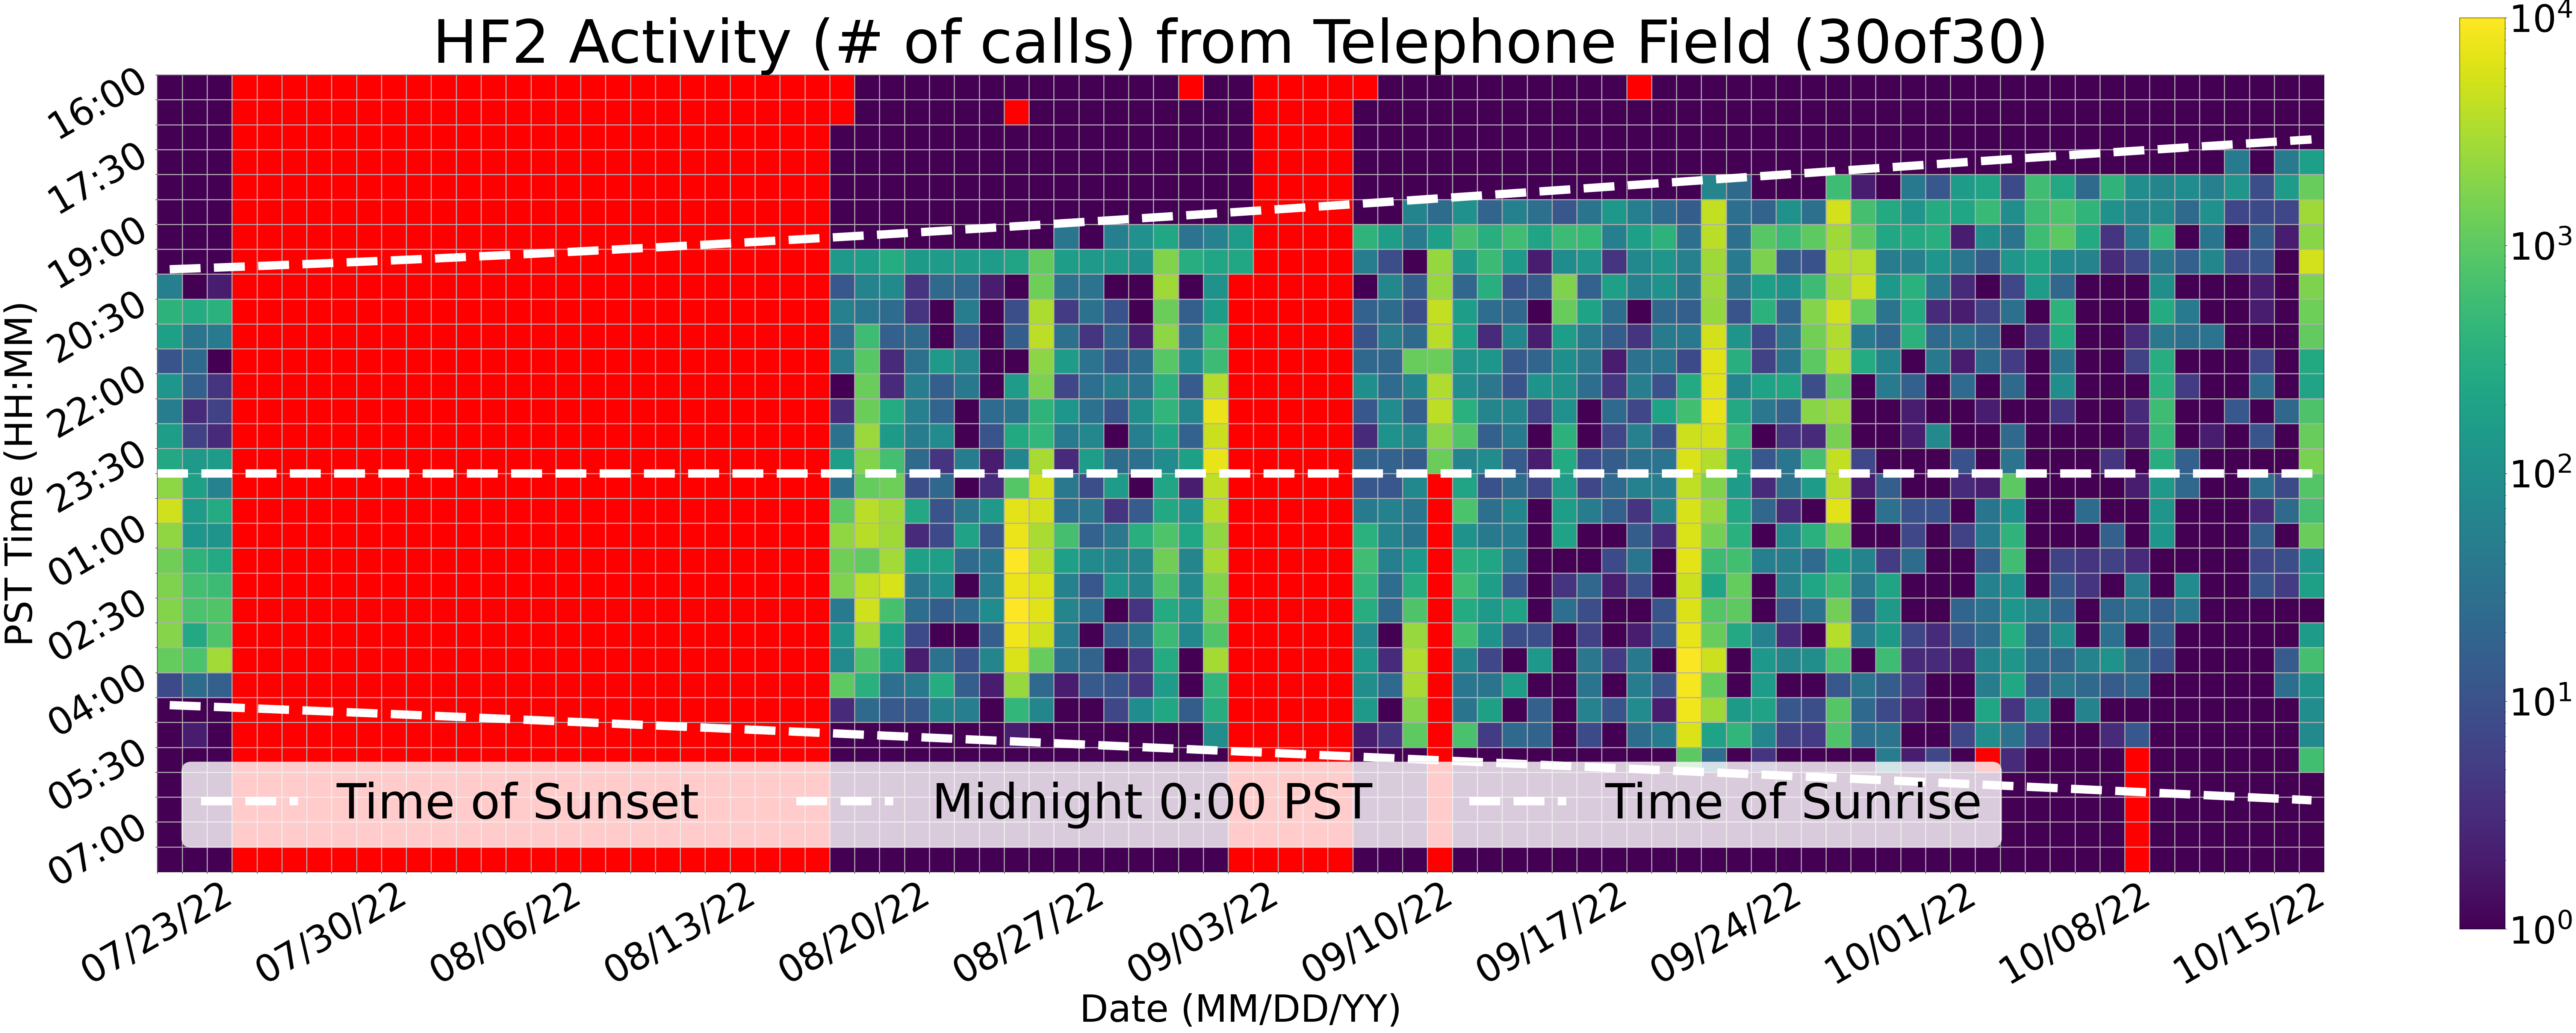

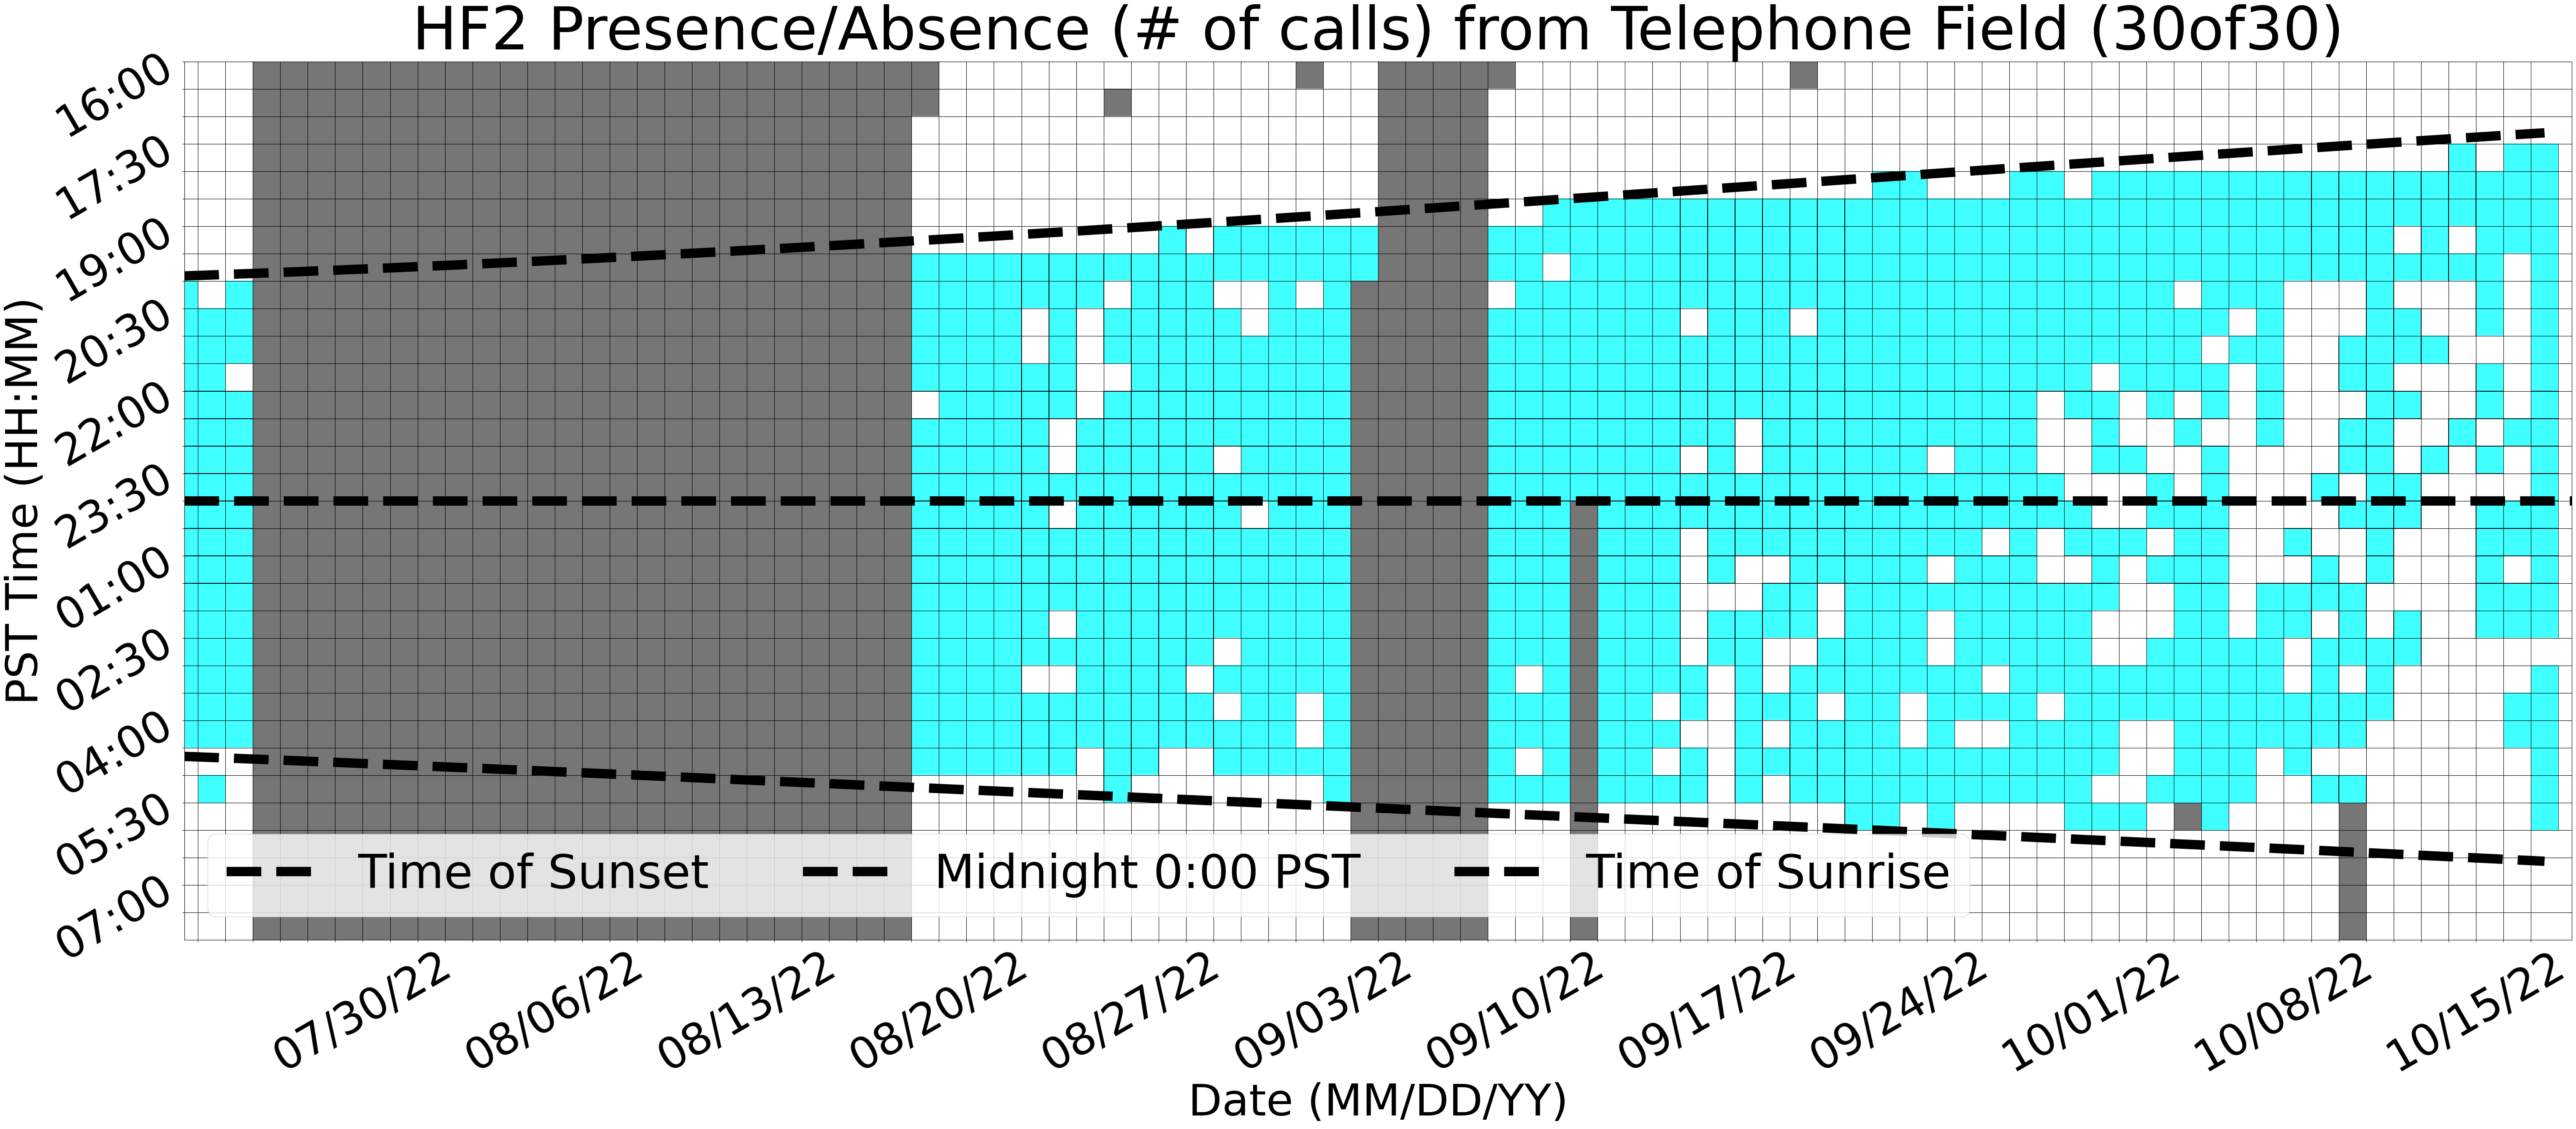

In [4]:
cycle_lengths = [30, 6]
percent_ons = [1/6]
specific_dc_tag = "30of30"

data_params = dict()
data_params["cycle_lengths"] = cycle_lengths
data_params["percent_ons"] = percent_ons
dc_tags = ss.get_list_of_dc_tags(data_params["cycle_lengths"], data_params["percent_ons"])
data_params["dc_tags"] = dc_tags
data_params["cur_dc_tag"] = specific_dc_tag
data_params['bin_size'] = '30'
data_params['recording_start'] = '00:00'
data_params['recording_end'] = '16:00'

pipeline_params = dict()
pipeline_params['assemble_location_summary'] = True
pipeline_params["read_csv"] = False
pipeline_params["save_activity_grid"] = False
pipeline_params["save_presence_grid"] = False
pipeline_params["save_dc_night_comparisons"] = False
pipeline_params["save_activity_dc_comparisons"] = False
pipeline_params["save_presence_dc_comparisons"] = False
pipeline_params["show_plots"] = True
pipeline_params["show_PST"] = True

site_keys = ['Telephone']
for site_key in site_keys:
    for type_key in FREQ_GROUPS[site_key].keys():
        print(site_key, type_key)

        data_params["site_name"] = SITE_NAMES[site_key]
        data_params["site_tag"] = site_key
        data_params["type_tag"] = type_key

        file_paths = get_file_paths(data_params)

        activity_dets_arr = pipeline.run_for_dets(data_params, pipeline_params, file_paths)
        plot.plot_activity_grid_for_dets(activity_dets_arr, data_params, pipeline_params, file_paths)
        plot.plot_presence_grid(activity_dets_arr, data_params, pipeline_params, file_paths)

In [5]:
activity_dets_arr

num_dets (30of30)  num_dets (5of30)  num_dets (1of6)
datetime_UTC                                                             
2022-07-23 00:00:00                0.0               0.0              0.0
2022-07-23 00:30:00                0.0               0.0              0.0
2022-07-23 01:00:00                0.0               0.0              0.0
2022-07-23 01:30:00                0.0               0.0              0.0
2022-07-23 02:00:00                0.0               0.0              0.0
...                                ...               ...              ...
2022-10-17 13:30:00              621.0             112.0            197.0
2022-10-17 14:00:00                0.0               0.0              0.0
2022-10-17 14:30:00                0.0               0.0              0.0
2022-10-17 15:00:00                0.0               0.0              0.0
2022-10-17 15:30:00                0.0               0.0              0.0

[2784 rows x 3 columns]